# Hopfield Networks 

In [58]:
import numpy as np
from numpy.random import randint, choice
from numpy import exp

In [305]:
class Hopfield:
    def __init__(self, nunits, weights, initial_states=None):
        self.nunits = nunits
        self.states = self.init_states(initial_states)
        self.weights = self.init_weights(weights)
        self.transition_states = self.update_transitions()
        
    def init_states(self, initial_states):
        if initial_states is None:
            return choice([0,1], size=self.nunits).reshape(-1,1)
        else:
            return initial_states.reshape(-1,1)
            
    def init_weights(self, weights):
        W = np.zeros((self.nunits, self.nunits))
        W[np.triu_indices(self.nunits, k=1)] = weights
        return W
    
    def update_transitions(self):
        transitions = np.triu(self.states @ self.states.T)
        transitions[np.diag_indices(self.nunits)] = 0
        return transitions
    
    def get_energy(self):
        return -np.sum(self.transition_states * self.weights)
    
    def update_random_state(self):
        target = randint(0, self.nunits)
        delta_state = 1 if self.states.T @ self.weights[:, target] > 0 else 0
        self.states[target] = delta_state
        self.transition_states = self.update_transitions()
    
    def minimize_energy(self, iterations=10, verbose=False):
        print(f"Initial energy: {self.get_energy()}")
        for it in range(iterations):
            self.update_random_state()
            if verbose:
                print(f"At iteration {it}, energy {self.get_energy()}")

In [306]:
weights = [0, 1, -2, 0, 1, 0, -3, 2, 2, 3]

weights = [-4, 3, 2, 0, 0, 3, 3, -1, 0, -1]
states0 = np.array([[1, 0, 1, 0, 0]], dtype=float)
hnet = Hopfield(5, weights, initial_states=states0)

In [307]:
hnet.minimize_energy(iterations=10, verbose=True)

Initial energy: -3.0
At iteration 0, energy -4.0
At iteration 1, energy -4.0
At iteration 2, energy -4.0
At iteration 3, energy -4.0
At iteration 4, energy -4.0
At iteration 5, energy 1.0
At iteration 6, energy 1.0
At iteration 7, energy 1.0
At iteration 8, energy -0.0
At iteration 9, energy -0.0


In [139]:
# States of the network
S = np.array([[1, 0, 1, 0, 0]], dtype=float).T

# values of connections in the nework
wvalues = np.array([0, -4, 3, 2, 0, # from state 0 to states 0, 1, 2, 3, 4
                    0, 0, 3, 3,     # from state 1 to states 1, 2, 3, 4
                    0, -1, 0,       # from state 2 to states 2, 3, 4
                    0, -1,          # from state 3 to states 3, 4
                    0])             # from state 4 to state  4

# Weight matrix
W = np.zeros((5,5))
W[np.triu_indices(5)] = wvalues

# Transition matrix for states
S_conn = np.triu(S @ S.T)
S_conn[np.diag_indices(5)] = 0

In [142]:
S_conn

array([[ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]])

In [135]:
# Current state of the network
np.sum(S_conn * W)

3.0

In [139]:
# Value below 0 -> off
target = 1
S.T @ W[:,target]
S[target] = 0

np.sum(S_conn * W)

3.0

In [148]:
# Value above 0 -> on
target = 2
S.T @ W[:,target]
S[target] = 0

np.sum(S_conn * W)

3.0

In [156]:
# Value above 0 -> on; state changes, total energy goes down
target = 3
delta_state = 1 if S.T @ W[:,target] > 0 else 0
S[target] = delta_state
S_conn = np.triu(S @ S.T)

np.sum(S_conn * W)

2.0

If $\Delta E = -3$, then $P(s=1)$ increases when $T$ increases.

Recall: 
$$
    P(s_i=1) = \frac{1}{1 + e^{-\Delta E_i / T}}
$$

In [4]:
p = np.vectorize(lambda deltaE, T: 1 / (1 + exp(-deltaE / T)))
p(-3, [1,2,3,4,5])

array([ 0.04742587,  0.18242552,  0.26894142,  0.3208213 ,  0.35434369])

## Boltzmann-Machine

In [28]:
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

In [38]:
def plot_temperature(t):
    temperatures = p(np.linspace(-5, 5, 500), t)
    plt.figure(figsize=(15,10))
    plt.plot(temperatures, label=f"T={t}")
    plt.ylim(0, 1.1)
    plt.legend()
    plt.show()

In [40]:
interact(plot_temperature, t=FloatSlider(min=0.1, max=1, step=0.1, value=0.5))

A Jupyter Widget

<function __main__.plot_temperature>

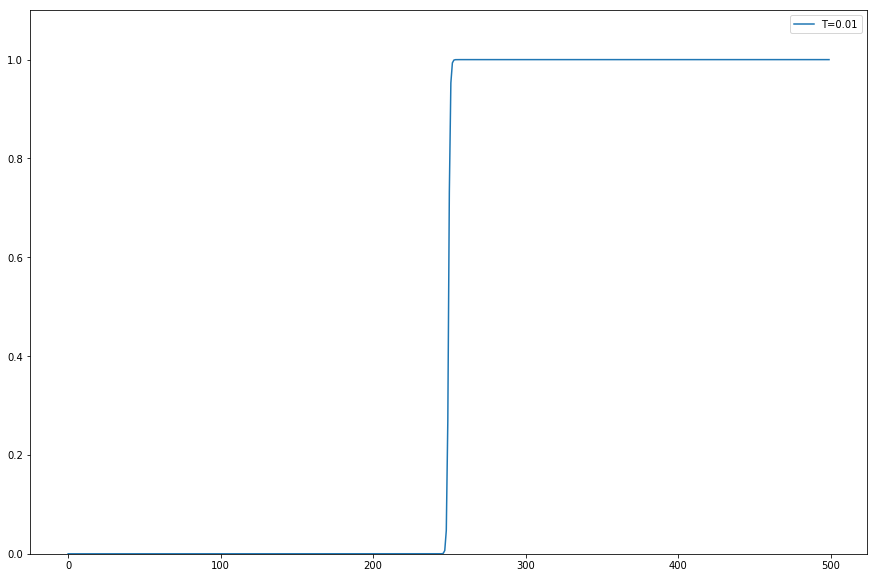

In [44]:
plot_temperature(0.01)

In [ ]:
0.3655